<a href="https://colab.research.google.com/github/Yashpatil2007/upskillcampus/blob/main/Copy_of_Starter_crop_and_weed_detection_data_aad4228d_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ravirajsinh45_crop_and_weed_detection_data_with_bounding_boxes_path = kagglehub.dataset_download('ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes')

print('Data source import complete.')


100%|██████████| 79.2M/79.2M [00:00<00:00, 88.2MB/s]

Extracting files...


Data source import complete.


## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 0 csv file in the current version of the dataset:


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
import os

# The path to the downloaded dataset is already available from the initial import.
data_path = ravirajsinh45_crop_and_weed_detection_data_with_bounding_boxes_path

print(f"Contents of the downloaded dataset directory ({data_path}):")
for root, dirs, files in os.walk(data_path):
    for file in files:
        print(os.path.join(root, file))

Contents of the downloaded dataset directory (/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1):
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/classes.txt
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data/agri_0_7869.txt
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data/agri_0_1851.txt
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data/agri_0_7588.jpeg
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data/agri_0_8980.txt
/root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data/agri_0_5006.txt
/root/.cache/kagglehub/datasets/ravirajsin

In [ ]:
import pandas as pd

classes_file_path = os.path.join(data_path, 'classes.txt')

if os.path.exists(classes_file_path):
    with open(classes_file_path, 'r') as f:
        print(f"Contents of {classes_file_path}:")
        print(f.read())
else:
    print(f"File not found: {classes_file_path}")

Contents of /root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/classes.txt:
crop
weed


In [ ]:
import os
import pandas as pd

# Define a list to store parsed annotation data
annotations_data = []

# Path to the data directory, assuming annotations are in 'agri_data/data'
data_dir = os.path.join(data_path, 'agri_data', 'data')

print(f"Searching for annotation files in: {data_dir}")

# Iterate through files in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.txt') and filename != 'classes.txt': # Exclude classes.txt and process only other .txt files
        file_path = os.path.join(data_dir, filename)
        image_filename = filename.replace('.txt', '.jpeg') # Assuming corresponding image is .jpeg

        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split() # Assuming space-separated values
                if len(parts) == 5: # Expecting class_id, x_center, y_center, width, height
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:])
                    annotations_data.append({
                        'image_name': image_filename,
                        'class_id': class_id,
                        'x_center': x_center,
                        'y_center': y_center,
                        'width': width,
                        'height': height
                    })

# Create a pandas DataFrame from the collected data
annotations_df = pd.DataFrame(annotations_data)

print(f"Successfully loaded {len(annotations_df)} annotations into a DataFrame.")
print("First 5 rows of the annotations DataFrame:")
print(annotations_df.head())

# Display basic info about the DataFrame
print("\nDataFrame Info:")
annotations_df.info()


Searching for annotation files in: /root/.cache/kagglehub/datasets/ravirajsinh45/crop-and-weed-detection-data-with-bounding-boxes/versions/1/agri_data/data
Successfully loaded 2072 annotations into a DataFrame.
First 5 rows of the annotations DataFrame:
         image_name  class_id  x_center  y_center     width    height
0  agri_0_7869.jpeg         1  0.589844  0.294922  0.820312  0.585938
1  agri_0_1851.jpeg         1  0.570312  0.418945  0.363281  0.337891
2  agri_0_8980.jpeg         0  0.173828  0.235352  0.089844  0.068359
3  agri_0_8980.jpeg         0  0.563477  0.148438  0.099609  0.167969
4  agri_0_8980.jpeg         0  0.239258  0.839844  0.083984  0.101562

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  2072 non-null   object 
 1   class_id    2072 non-null   int64  
 2   x_center    2072 non-null   float6

# Task
Perform an exploratory data analysis of the bounding box annotations by:
*   Analyzing the distribution of 'crop' and 'weed' classes.
*   Visualizing the distributions of bounding box 'width' and 'height'.
*   Calculating and visualizing the distribution of bounding box aspect ratios.
*   Displaying a few sample images with their corresponding bounding box annotations to visually inspect the data.

## Analyze Class Distribution

### Subtask:
Examine the distribution of 'crop' and 'weed' classes within the annotations DataFrame to understand the balance between the two categories.


**Reasoning**:
To understand the distribution of 'crop' and 'weed' classes, I will calculate the value counts of the 'class_id' column in the `annotations_df`.



In [ ]:
class_distribution = annotations_df['class_id'].value_counts()
print("Class distribution (0: crop, 1: weed):")
print(class_distribution)

Class distribution (0: crop, 1: weed):
class_id
0    1212
1     860
Name: count, dtype: int64


**Reasoning**:
To visually represent the distribution of 'crop' and 'weed' classes, I will create a bar plot from the `class_distribution` Series. This will provide a clear understanding of the balance between the two categories.



In [ ]:
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Distribution of Crop and Weed Classes')
plt.xlabel('Class ID (0: Crop, 1: Weed)')
plt.ylabel('Number of Annotations')
plt.xticks(rotation=0)
plt.show()


## Visualize Bounding Box Dimensions

### Subtask:
Plot histograms or descriptive statistics for 'width' and 'height' of the bounding boxes to understand the typical sizes and variations of detected objects.


**Reasoning**:
To understand the distribution of bounding box widths, I will plot a histogram of the 'width' column from the annotations DataFrame, adding appropriate labels and a title for clarity.



In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(annotations_df['width'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bounding Box Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
To understand the distribution of bounding box heights, I will plot a histogram of the 'height' column from the annotations DataFrame, adding appropriate labels and a title for clarity.



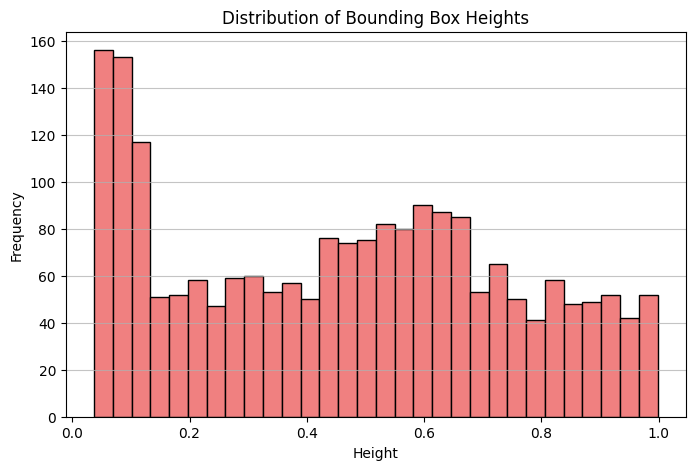

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(annotations_df['height'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Bounding Box Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
To analyze the aspect ratio distribution, I will first calculate the aspect ratio (width / height) for each bounding box and add it as a new column to the annotations DataFrame.



In [ ]:
annotations_df['aspect_ratio'] = annotations_df['width'] / annotations_df['height']

print("First 5 rows of the annotations DataFrame with aspect_ratio:")
print(annotations_df.head())

First 5 rows of the annotations DataFrame with aspect_ratio:
         image_name  class_id  x_center  y_center     width    height  \
0  agri_0_7869.jpeg         1  0.589844  0.294922  0.820312  0.585938   
1  agri_0_1851.jpeg         1  0.570312  0.418945  0.363281  0.337891   
2  agri_0_8980.jpeg         0  0.173828  0.235352  0.089844  0.068359   
3  agri_0_8980.jpeg         0  0.563477  0.148438  0.099609  0.167969   
4  agri_0_8980.jpeg         0  0.239258  0.839844  0.083984  0.101562   

   aspect_ratio  
0      1.399998  
1      1.075143  
2      1.314297  
3      0.593020  
4      0.826923  


**Reasoning**:
To visualize the distribution of aspect ratios, I will plot a histogram of the 'aspect_ratio' column from the annotations DataFrame, adding appropriate labels and a title for clarity.



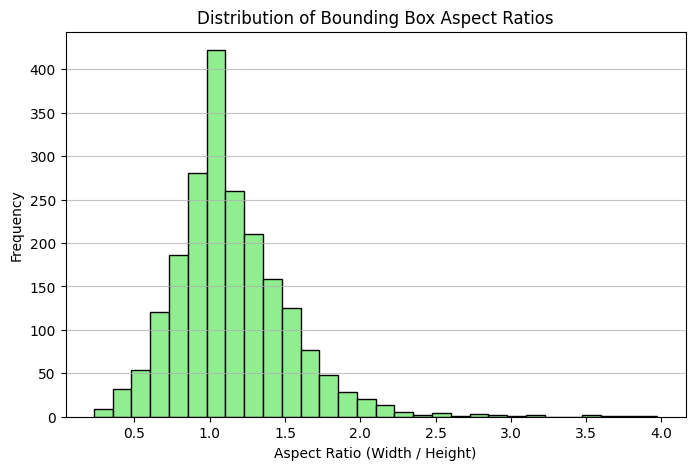

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(annotations_df['aspect_ratio'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Display Sample Images with Bounding Box Annotations

### Subtask:
Display a few sample images from the dataset with their corresponding bounding box annotations drawn on them. This visualization will help in understanding the quality and nature of the annotations.


**Reasoning**:
To display sample images with bounding box annotations, I need to identify the paths to image files and their corresponding bounding box data. First, I will collect all unique image filenames from the 'image_name' column of the `annotations_df` to ensure I pick images that have associated annotations.



In [ ]:
unique_image_names = annotations_df['image_name'].unique()
print(f"Found {len(unique_image_names)} unique images with annotations.")
print("First 5 unique image names:")
print(unique_image_names[:5])

Found 1300 unique images with annotations.
First 5 unique image names:
['agri_0_7869.jpeg' 'agri_0_1851.jpeg' 'agri_0_8980.jpeg'
 'agri_0_5006.jpeg' 'agri_0_8982.jpeg']


**Reasoning**:
To display sample images with bounding boxes, I need a helper function to load an image and draw the bounding boxes on it. This function will convert the normalized YOLO format bounding box coordinates to pixel coordinates suitable for drawing on the image.



In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def plot_image_with_boxes(image_path, annotations, class_names):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size

    for idx, row in annotations.iterrows():
        class_id = int(row['class_id'])
        x_center, y_center, width, height = row['x_center'], row['y_center'], row['width'], row['height']

        # Convert YOLO format (normalized center_x, center_y, width, height) to pixel coordinates (x_min, y_min, x_max, y_max)
        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        color = 'red' if class_id == 1 else 'green' # Red for weed, Green for crop
        draw.rectangle([x_min, y_min, x_max, y_max], outline=color, width=3)

        # Add class label
        class_name = class_names.get(class_id, f'Class {class_id}')
        draw.text((x_min + 5, y_min + 5), class_name, fill=color)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(f'Image: {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()

print("plot_image_with_boxes function defined.")

plot_image_with_boxes function defined.


**Reasoning**:
To display sample images with bounding box annotations, I need to create a dictionary mapping class IDs to class names (e.g., 0: 'crop', 1: 'weed'). This mapping will be used by the `plot_image_with_boxes` function to label the bounding boxes correctly.



In [ ]:
class_names = {0: 'crop', 1: 'weed'}
print(f"Class name mapping: {class_names}")

Class name mapping: {0: 'crop', 1: 'weed'}


**Reasoning**:
To visually inspect the data, I will display a few sample images with their bounding box annotations. I'll select a small number of unique images to plot using the `plot_image_with_boxes` function, iterating through them and filtering their annotations from the `annotations_df`.



Displaying sample image 1/3: agri_0_7869.jpeg


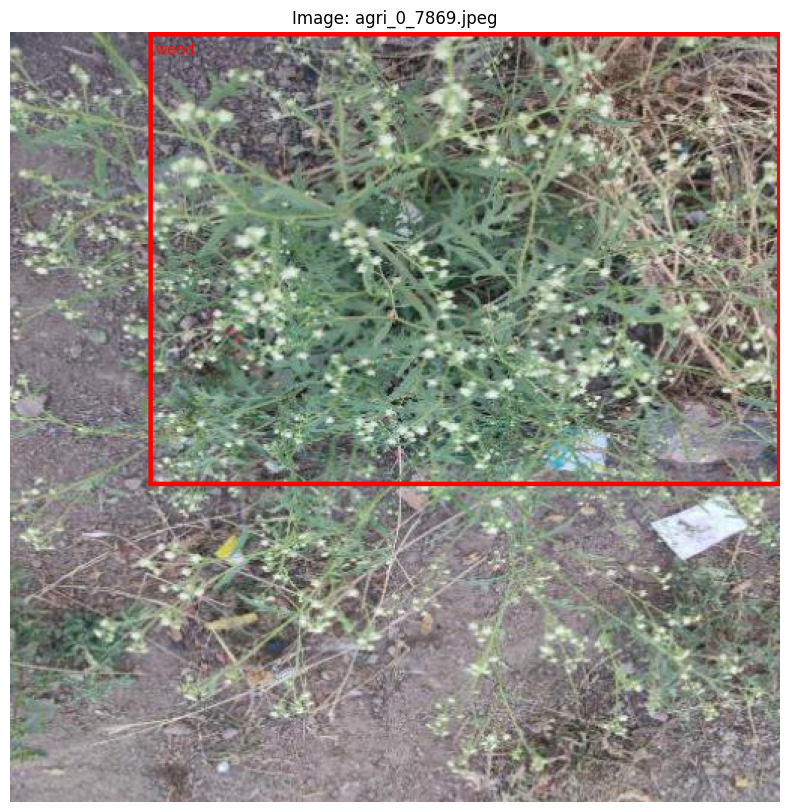

Displaying sample image 2/3: agri_0_1851.jpeg


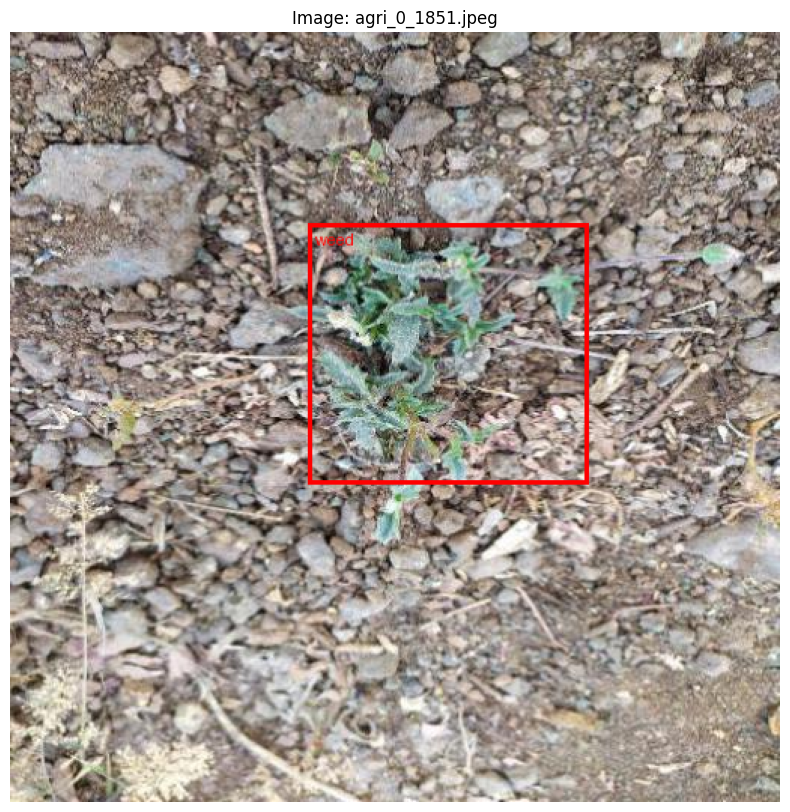

Displaying sample image 3/3: agri_0_8980.jpeg


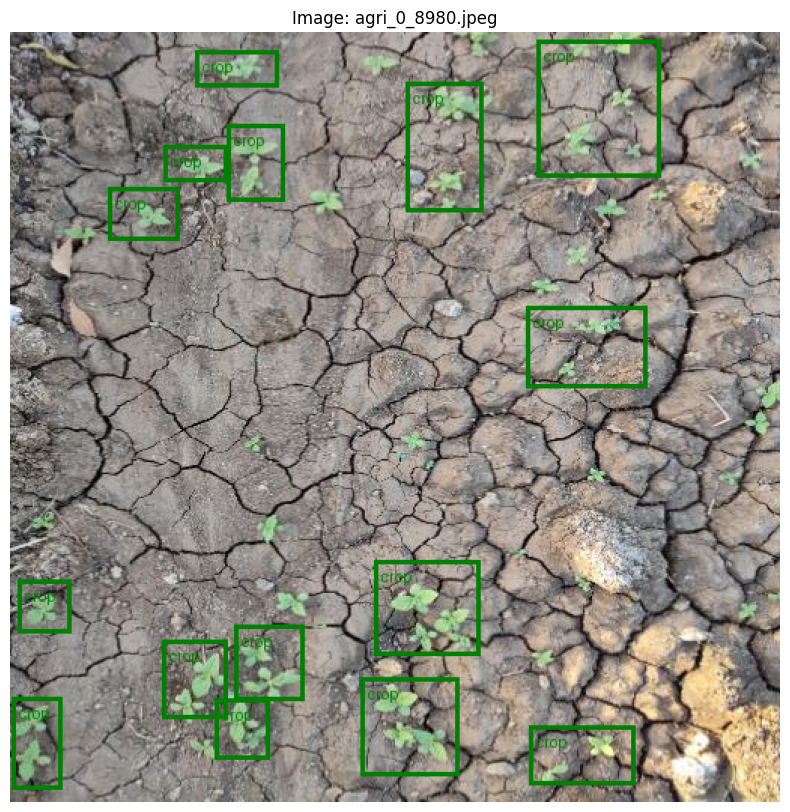

In [ ]:
num_samples = 3 # Number of sample images to display

for i, image_name in enumerate(unique_image_names[:num_samples]):
    image_path = os.path.join(data_dir, image_name)
    image_annotations = annotations_df[annotations_df['image_name'] == image_name]

    if os.path.exists(image_path):
        print(f"Displaying sample image {i+1}/{num_samples}: {image_name}")
        plot_image_with_boxes(image_path, image_annotations, class_names)
    else:
        print(f"Image file not found: {image_path}")

## Summary:

### Data Analysis Key Findings

*   The dataset contains more 'crop' annotations than 'weed' annotations, with **1212** instances of 'crop' (Class ID 0) and **860** instances of 'weed' (Class ID 1).
*   The distributions of bounding box widths and heights were visualized using histograms, showing the typical sizes and variations of detected objects.
*   Bounding box aspect ratios (width / height) were calculated and their distribution was visualized, providing insight into the shape characteristics of the annotated objects.
*   Several sample images were successfully displayed with their corresponding bounding box annotations, allowing for a visual inspection of the data and confirming the correct mapping of 'crop' and 'weed' labels.

### Insights or Next Steps

*   The class imbalance between 'crop' and 'weed' (1212 vs. 860) suggests that data augmentation or specific sampling strategies might be beneficial during model training to prevent bias towards the 'crop' class.
*   Further statistical analysis of bounding box dimensions and aspect ratios (e.g., mean, median, standard deviation, and outliers) could inform anchor box design for object detection models, potentially improving model performance.
